In [1]:
# 全连接网络是由多个全连接层所组成的神经网络 
# 它由输入层 隐藏层1....隐藏层N 输出层组成的N+1层全连接网络
# 例如我们设计一个隐藏层结点数为[256,128,64] 输出层节点为10的全连接层

In [7]:
# 利用张量方式实现网络
import tensorflow as tf

x = tf.random.normal([4, 28*28])

# 隐藏层1张量
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))

# 隐藏层2张量
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))

# 隐藏层3张量
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))

# 输出层张量
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

# 自动求导 梯度下降
with tf.GradientTape() as tape: # 梯度记录器
    # x: [b, 28*28]
    # 隐藏层1向前计算 [b, 28*28] => [b, 256]
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)
    # 隐藏层2向前计算
    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2)
    # 隐藏层3向前计算
    h3 = h2@w3 + b3
    h3 = tf.nn.relu(h3)
    # 输出层向前计算 [b, 64] => [b, 10]
    h4 = h3@w4 + b4
    # 是否添加激活函数 视情况而定
    h4 = tf.nn.relu(h4)

In [8]:
h4

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[0.31839967, 0.00322977, 0.        , 0.        , 0.3878303 ,
        0.2107167 , 1.1170461 , 2.247515  , 0.79741186, 0.        ],
       [1.1897236 , 0.289958  , 0.0387656 , 0.        , 0.        ,
        0.05823572, 1.2888383 , 2.490318  , 0.83168215, 0.        ],
       [1.6613817 , 0.        , 0.53605086, 0.        , 0.46365896,
        0.        , 0.6200029 , 1.6854393 , 1.2107457 , 0.        ],
       [0.68990964, 0.        , 0.        , 0.6594955 , 0.40097094,
        0.        , 1.3237317 , 1.7931515 , 1.3872172 , 0.        ]],
      dtype=float32)>

In [9]:
# 利用层的方式实现神经网络

# 导入网络层layers
from tensorflow.keras import layers,Sequential

fc1 = layers.Dense(256, activation=tf.nn.relu) # 隐藏层1
fc2 = layers.Dense(128, activation=tf.nn.relu) # 隐藏层2
fc3 = layers.Dense(64, activation=tf.nn.relu) # 隐藏层3
fc4 = layers.Dense(10, activation=None) # 输出层

# out = x @ w + b
x = tf.random.normal([4, 28*28])
h1 = fc1(x) # 通过隐藏层1得到输出
h2 = fc2(h1) # 通过隐藏层2得到输出
h3 = fc3(h2) # 通过隐藏层3得到输出
h4 = fc4(h3) # 通过输出层得到网络输出

h4

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.39352125,  1.1168333 ,  0.70824564, -0.22654438, -0.1675691 ,
         0.2759868 , -0.31926754,  0.7622546 ,  0.90142286, -0.63602704],
       [-0.2644961 , -0.31445098,  0.8037093 ,  0.20374127, -1.135761  ,
         0.03709037, -0.25511247,  0.7038002 ,  0.3590144 , -1.0018922 ],
       [ 0.18004851, -0.90000075,  0.49598476, -0.07867048, -0.4151477 ,
        -0.21052869, -0.2346026 ,  1.141526  ,  0.603846  , -0.64028865],
       [ 0.16814102, -0.8333706 ,  1.243499  , -0.17467919, -0.7605849 ,
        -0.39123175, -0.6421089 ,  1.4691424 ,  0.20334943,  0.04109315]],
      dtype=float32)>

In [13]:
# 利用Sequential容器封装神经网络类
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Dense(256, activation=tf.nn.relu) , # 创建隐藏层1
    layers.Dense(128, activation=tf.nn.relu) , # 创建隐藏层2
    layers.Dense(64, activation=tf.nn.relu) , # 创建隐藏层3
    layers.Dense(10, activation=None) , # 创建输出层
])

x = tf.random.normal([4, 28*28])
out = model(x) # 向前计算得出结果
out 

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 4.6151114e-01, -4.6893361e-01,  2.4024675e+00,  6.2790221e-01,
        -4.0852213e-01, -3.0102858e-01, -1.3638630e+00, -3.3626810e-01,
         3.7061942e-01,  4.1682002e-01],
       [ 4.9468809e-01,  3.8059603e-02,  3.5430069e+00,  5.1030284e-01,
        -1.0166956e+00, -9.3529999e-02, -1.3405893e+00, -4.0178958e-01,
        -4.2607147e-01,  1.1941801e+00],
       [ 1.3306453e+00,  1.1229604e-01,  3.6296155e+00,  4.2712638e-01,
        -6.7271072e-01, -1.3936559e-02, -6.8343621e-01, -2.5800121e-01,
         2.7481320e-03,  1.0325030e+00],
       [ 3.8989088e-01,  9.0229017e-01,  3.4932041e+00,  1.1787579e+00,
        -1.5780317e+00,  1.1379989e+00, -1.8597670e+00,  5.1067501e-01,
        -4.5146921e-01,  6.6910774e-01]], dtype=float32)>

In [14]:
# [0,1]区间 和为1 使用Softmax函数
import tensorflow as tf
z = tf.constant([2.,1.,0.1])
tf.nn.softmax(z)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6590012 , 0.24243298, 0.09856589], dtype=float32)>

In [17]:
# 误差计算
# 1.均方差误差函数 MSE
import tensorflow as tf
from tensorflow import keras
o = tf.random.normal([2,10]) # 构造网络输出
y_onehot= tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = keras.losses.MSE(y_onehot, o) # 计算均方差
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.186461  , 0.19459926], dtype=float32)>

In [18]:
import tensorflow as tf
from tensorflow import keras
o = tf.random.normal([2,10]) # 构造网络输出
y_onehot= tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = keras.losses.MSE(y_onehot, o) # 计算均方差
loss = tf.reduce_mean(loss) #计算均方差
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.0253041>

In [19]:
# 利用层方式使用MSE计算loss
import tensorflow as tf
from tensorflow import keras
o = tf.random.normal([2,10]) # 构造网络输出
y_onehot= tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10)
criteon = keras.losses.MeanSquaredError()
loss = criteon(y_onehot, o) #计算batch均方差
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.0162425>

In [ ]:
# 交叉熵误差函数 CrossEntropy
# H（p||q）=-log（Oi）

2.2.0
(314, 9) (314,)
(78, 9) (78,)
Model: "network_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             multiple                  640       
_________________________________________________________________
dense_28 (Dense)             multiple                  4160      
_________________________________________________________________
dense_29 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the

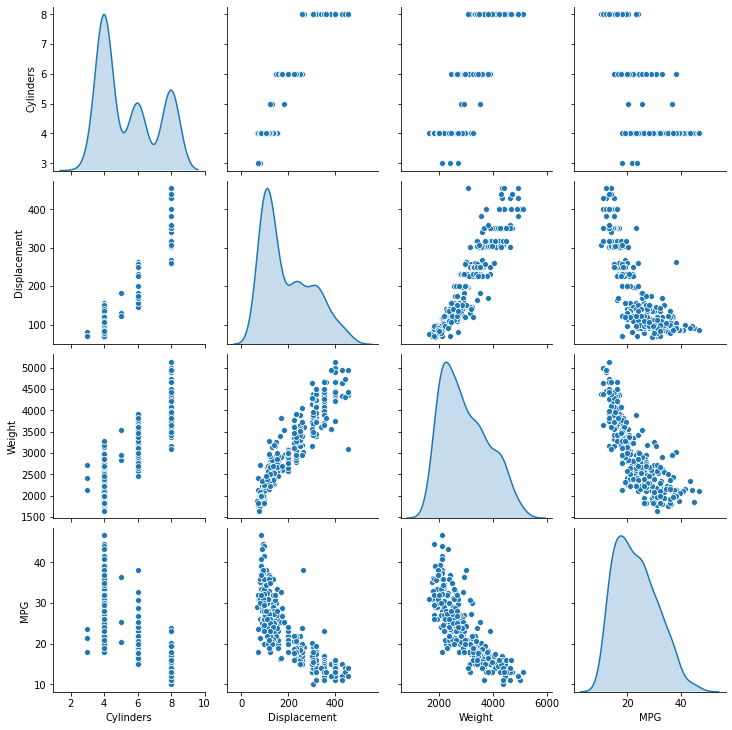

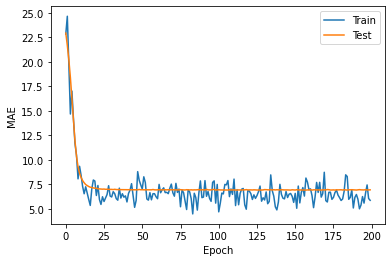

In [29]:
# 汽车油耗预测实战
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, losses

print(tf.__version__)


# 在线下载汽车效能数据集
dataset_path = keras.utils.get_file("auto-mpg.data", "http://qiniusave.luoshaoqi.cn/auto-mpg.data")

# 效能（公里数每加仑），气缸数，排量，马力，重量
# 加速度，型号年份，产地
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
# 查看部分数据
dataset.tail()
dataset.head()
dataset
#%%


#%%

# 统计空白数据,并清除
dataset.isna().sum()
dataset = dataset.dropna()
dataset.isna().sum()
dataset
#%%

# 处理类别型数据，其中origin列代表了类别1,2,3,分布代表产地：美国、欧洲、日本
# 其弹出这一列
origin = dataset.pop('Origin')
# 根据origin列来写入新列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()


# 切分为训练集和测试集
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index) 


#%% 统计数据
sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight", "MPG"]], 
diag_kind="kde")
#%%
# 查看训练集的输入X的统计数据
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats


# 移动MPG油耗效能这一列为真实标签Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


# 标准化数据
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
#%%

print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)
#%%

class Network(keras.Model):
    # 回归网络
    def __init__(self):
        super(Network, self).__init__()
        # 创建3个全连接层
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)

    def call(self, inputs, training=None, mask=None):
        # 依次通过3个全连接层
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

model = Network()
model.build(input_shape=(None, 9))
model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.001)
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

# # 未训练时测试
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result


train_mae_losses = []
test_mae_losses = []
for epoch in range(200):
    for step, (x,y) in enumerate(train_db):

        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(losses.MSE(y, out))
            mae_loss = tf.reduce_mean(losses.MAE(y, out)) 

        if step % 10 == 0:
            print("epoch:%d;stop:%d;loss:%f" % (epoch, step, float(loss)))

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_mae_losses.append(float(mae_loss))
    out = model(tf.constant(normed_test_data.values))
    test_mae_losses.append(tf.reduce_mean(losses.MAE(test_labels, out)))


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(train_mae_losses,  label='Train')

plt.plot(test_mae_losses, label='Test')
plt.legend()
 
# plt.ylim([0,10])
plt.legend()
plt.savefig('auto.svg')
plt.show() 